<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/LLM_Probabilistic_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install --upgrade google-generativeai

To use the Gemini API, you'll need an API key. If you don't already have one, create a key in Google AI Studio.
In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`. Then pass the key to the SDK:

In [31]:
# Import the Python SDK
import google.generativeai as genai
# Used to securely store your API key
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

Before you can make any API calls, you need to initialize the Generative Model.

In [32]:
# Initialize the Gemini API
gemini_model = genai.GenerativeModel('gemini-2.5-flash-preview-04-17')

Now you can make API calls. For example, to generate a poem:

In [33]:
response = gemini_model.generate_content('Write a poem about the moon.')
print(response.text)

Oh, silent sphere of silver bright,
Hung in the deep and velvet night,
A gentle lamp, a watchful eye,
Across the star-strewn, endless sky.

Your pale light spills on field and tree,
On mountain high and rolling sea,
You paint the world in shades of grey,
And guide the wanderer on their way.

From slender curve to circle full,
Unchanging through the ages run,
You cast your ancient, mystic pull,
Older than all beneath the sun.

A quiet peace upon us lies,
While weary earthly creatures sleep,
Reflected in our lifted eyes,
A sense of wonder, calm, and deep.

So hang serene, oh queen of night,
A timeless, constant, beautiful sight,
Bathed in your own ethereal light,
Guiding us softly towards the light.


In [34]:
import google.generativeai as genai
import matplotlib.pyplot as plt
import numpy as np

# Used to securely store your API key
from google.colab import userdata

# Configure the Gemini API
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

# Initialize the Gemini API
# Using a model that supports token probabilities (e.g., 'gemini-1.5-flash-latest')
# Note: Not all models support `logprobs`. Check the documentation for supported models.
# As of now, 'gemini-1.5-flash-latest' is a good option for this.
gemini_model = genai.GenerativeModel('gemini-1.5-flash-latest')

# The incomplete sentence
sentence = "After years of hard work, your effort will take you"

# Get completion with logprobs
# Note: `logprobs` is not a direct parameter in generate_content.
# We'll simulate this by asking the model to provide a list of possible next words and their likelihoods.
# This is a workaround as direct logprob access like OpenAI's is not directly available for all models/methods in the same way.

# A prompt engineering approach to get probabilities
prompt = f"""Given the following sentence, what are the top 10 most likely next words or tokens to complete it, along with their approximate probabilities?
Sentence: "{sentence}"
Format the output as a Python dictionary with the token as the key and the probability (as a float between 0 and 1) as the value.
For example:
{{' to': 0.8, ' there': 0.1, ' far': 0.05, ...}}
Ensure the probabilities sum close to 1.0 for the top tokens you provide.
"""

response = gemini_model.generate_content(prompt)

# Attempt to parse the response as a dictionary
try:
    # Clean up the response text to be valid JSON/dictionary string
    response_text = response.text.strip()
    # Ensure it starts and ends with curly braces if not already
    if not response_text.startswith('{'):
        response_text = '{' + response_text
    if not response_text.endswith('}'):
        response_text = response_text + '}'

    # Attempt to parse the cleaned string as a dictionary
    import json
    # Use json.loads for safer parsing of potential JSON-like strings
    probs = json.loads(response_text)

    print(f"Number of tokens received: {len(probs)}")

    # Normalize probabilities (if needed, based on how the model responds)
    total = sum(probs.values())
    if total > 0: # Avoid division by zero
      probs = {token: prob / total for token, prob in probs.items()}
    else:
      print("Warning: Probabilities sum to zero. Cannot normalize.")


    # Sort probabilities
    sorted_items = sorted(probs.items(), key=lambda x: x[1], reverse=True)
    print("\nTop tokens with their probabilities:")
    for token, prob in sorted_items:
        print(f"'{token}': {prob:.3%}")

    tokens, probabilities = zip(*sorted_items)

    # Create visualization showing all available tokens
    plt.figure(figsize=(15, max(5, len(tokens)*0.5)))  # Adjust figure height based on number of tokens
    plt.barh(range(len(tokens)), probabilities)
    plt.yticks(range(len(tokens)), tokens)
    plt.title(f'Distribution of Next Token Probabilities (Total tokens: {len(tokens)})')
    plt.xlabel('Probability')
    plt.ylabel('Token')

    # Add percentage labels
    for i, prob in enumerate(probabilities):
        plt.text(prob, i, f' {prob:.1%}', va='center')

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Could not parse the model response as a dictionary: {e}")
    print("Model response text:")
    print(response.text)

Could not parse the model response as a dictionary: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
Model response text:
It's impossible to give exact probabilities without access to a massive language model and its trained weights.  The probabilities below are *estimates* based on common English usage and sentence completion patterns.  They are *not* derived from any specific model.

```python
next_word_probabilities = {
    "to": 0.4,  # Very common completion
    "far": 0.2,  # Common idiom
    "where": 0.15, # Suggests a journey or destination
    "places you never imagined": 0.08, # Longer phrase, captures possibility
    "a long way": 0.05, # Similar to "far"
    "to success": 0.04, # Related to "hard work"
    "to great things": 0.03, # Positive reinforcement
    "to the top": 0.02, # Common expression
    "forward": 0.02, # Suggests progress
    "beyond": 0.01 #Suggests exceeding expectations

}

# Verify probabilities approximately sum to 1
total_pr

In [35]:
!pip install langchain_groq

You'll need an API key from Groq. Add it to Colab's Secrets Manager under the name `GROQ_API_KEY`.

In [36]:
import os
from google.colab import userdata

os.environ["GROQ_API_KEY"] = userdata.get('groq_api_key')

Now you can initialize and use a Groq model with LangChain. While direct logprob access might not be a standard feature exposed in the same way across all LangChain integrations, you can use the model for text generation and potentially explore other methods depending on the model's capabilities and LangChain's features.

In [37]:
from langchain_groq import ChatGroq

# Initialize the ChatGroq model
# You can specify a model name like 'llama3-8b-8192' or 'llama3-70b-8192'
chat = ChatGroq(temperature=0, model_name="llama-3.3-70b-versatile")

# Example usage: Get a completion for the sentence
sentence = "After years of hard work, your effort will take you"
prompt = f"{sentence}"

response = chat.invoke(prompt)
print(response.content)

# Note: Directly getting token likelihoods/logprobs like the previous example requires specific API support and might not be directly exposed through the standard LangChain Chat Model interface in the same way. You would need to check the Groq API documentation and LangChain's advanced features or callbacks for potential ways to access this information if the model supports it.

...to the top, or at least, closer to your goals. The phrase you're thinking of is likely: "After years of hard work, your effort will take you far." Or, alternatively, it could be: "After years of hard work, your effort will take you to new heights." Both phrases suggest that dedication and perseverance will ultimately lead to success and achievement.


In [38]:
!pip install groq

You'll still need your Groq API key. Make sure it's added to Colab's Secrets Manager under the name `GROQ_API_KEY` and loaded into the environment.

In [39]:
import os
from google.colab import userdata

os.environ["GROQ_API_KEY"] = userdata.get('groq_api_key')

Now, let's use the `groq-sdk` to interact with a model. We'll attempt to get token probabilities, but keep in mind that direct access to logprobs might still depend on the specific model and API capabilities.

In [40]:
from groq import Groq
import os
import json
from collections import Counter

client = Groq(api_key=os.environ.get("GROQ_API_KEY"))

def check_groq_logprobs_support():
    """
    Check if Groq API supports logprobs parameter
    """
    sentence = "After years of hard work, your effort will take you"

    try:
        # Try with logprobs parameter (likely to fail)
        chat_completion = client.chat.completions.create(
            messages=[
                {
                    "role": "user",
                    "content": f"Complete the following sentence: '{sentence}'",
                }
            ],
            model="llama3-8b-8192",
            max_tokens=1,
            temperature=0,
            # These parameters are NOT supported by Groq as of 2024
            # logprobs=True,
            # top_logprobs=5
        )

        print("Standard response:")
        print(chat_completion.choices[0].message.content)
        print("\nResponse structure:")
        print(json.dumps(chat_completion.model_dump(), indent=2))

        # Check if logprobs are in the response
        if hasattr(chat_completion.choices[0], 'logprobs'):
            print("✅ Logprobs found in response!")
            return True
        else:
            print("❌ No logprobs in response structure")
            return False

    except Exception as e:
        print(f"❌ Error: {e}")
        return False

def simulate_token_probabilities_groq(sentence, num_samples=100):
    """
    Workaround: Generate multiple completions to estimate probabilities
    This is inefficient but can give you a rough idea of token likelihoods
    """
    print(f"\n🔄 Generating {num_samples} samples to estimate probabilities...")

    completions = []

    for i in range(num_samples):
        try:
            response = client.chat.completions.create(
                messages=[
                    {
                        "role": "user",
                        "content": f"Complete the following sentence with exactly one word: '{sentence}'",
                    }
                ],
                model="llama3-8b-8192",
                max_tokens=5,  # Allow a few tokens to capture the first word
                temperature=0.7,  # Add some randomness
            )

            # Extract the first word/token from the completion
            completion = response.choices[0].message.content.strip()
            first_word = completion.split()[0] if completion.split() else completion
            completions.append(first_word)

            if (i + 1) % 20 == 0:
                print(f"Generated {i + 1}/{num_samples} samples...")

        except Exception as e:
            print(f"Error in sample {i}: {e}")
            continue

    # Calculate empirical probabilities
    token_counts = Counter(completions)
    total_samples = len(completions)

    print(f"\n📊 Empirical probabilities from {total_samples} samples:")
    print("-" * 50)

    for token, count in token_counts.most_common(10):
        probability = count / total_samples
        print(f"'{token}': {probability:.3f} ({count}/{total_samples})")

    return token_counts, total_samples

def compare_with_openai_style():
    """
    Show what the OpenAI equivalent would look like
    """
    print("\n🔄 OpenAI API equivalent (for reference):")
    print("-" * 50)

    openai_code = '''
import openai
import numpy as np

client = openai.OpenAI(api_key="your-key")

response = client.completions.create(
    model="gpt-3.5-turbo-instruct",
    prompt="After years of hard work, your effort will take you",
    max_tokens=1,
    logprobs=50,  # Get top 50 token probabilities
    temperature=0
)

# Extract logprobs
logprobs = response.choices[0].logprobs.top_logprobs[0]
probs = {token: np.exp(logprob) for token, logprob in logprobs.items()}

# Normalize
total = sum(probs.values())
probs = {token: prob/total for token, prob in probs.items()}

for token, prob in sorted(probs.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"'{token}': {prob:.3%}")
'''
    print(openai_code)

if __name__ == "__main__":
    print("🚀 Checking Groq API logprobs support...")

    # Check if logprobs are supported
    logprobs_supported = check_groq_logprobs_support()

    if not logprobs_supported:
        print("\n💡 Groq doesn't support direct logprobs access.")
        print("Using workaround method...")

        sentence = "After years of hard work, your effort will take you"

        # Use sampling workaround
        token_counts, total = simulate_token_probabilities_groq(sentence, num_samples=50)

        print(f"\n⚠️  Note: This is an approximation based on {total} samples.")
        print("For true logprobs, consider using:")
        print("1. OpenAI API (supports logprobs)")
        print("2. Hugging Face Transformers (local inference)")
        print("3. Other APIs that expose logprobs")

    # Show OpenAI comparison
    compare_with_openai_style()

🚀 Checking Groq API logprobs support...
Standard response:
'

Response structure:
{
  "id": "chatcmpl-d05e132b-99eb-466c-925c-99daf5f96789",
  "choices": [
    {
      "finish_reason": "length",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": "'",
        "role": "assistant",
        "executed_tools": null,
        "function_call": null,
        "reasoning": null,
        "tool_calls": null
      }
    }
  ],
  "created": 1750909544,
  "model": "llama3-8b-8192",
  "object": "chat.completion",
  "system_fingerprint": "fp_8dc6ecaf8e",
  "usage": {
    "completion_tokens": 1,
    "prompt_tokens": 28,
    "total_tokens": 29,
    "completion_time": 0.001569205,
    "prompt_time": 0.009374796,
    "queue_time": 0.064101801,
    "total_time": 0.010944001
  },
  "usage_breakdown": null,
  "x_groq": {
    "id": "req_01jyn5esgve5yat5sffzz6q3yh"
  }
}
✅ Logprobs found in response!

🔄 OpenAI API equivalent (for reference):
-------------------------------------------

🚀 Getting token probabilities with Hugging Face Transformers...
Loading model: gpt2

Top 50 next token probabilities:
--------------------------------------------------
 1. ' to': 0.3729 (37.29%)
 2. ' through': 0.0977 (9.77%)
 3. ' far': 0.0547 (5.47%)
 4. ' back': 0.0422 (4.22%)
 5. ' a': 0.0365 (3.65%)
 6. ' the': 0.0244 (2.44%)
 7. ' out': 0.0220 (2.20%)
 8. ' from': 0.0218 (2.18%)
 9. ' where': 0.0162 (1.62%)
10. ' on': 0.0130 (1.30%)
11. ' closer': 0.0121 (1.21%)
12. ' farther': 0.0117 (1.17%)
13. ' down': 0.0101 (1.01%)
14. ' many': 0.0097 (0.97%)
15. ' somewhere': 0.0090 (0.90%)
16. ' beyond': 0.0084 (0.84%)
17. ' away': 0.0082 (0.82%)
18. ' nowhere': 0.0082 (0.82%)
19. ' home': 0.0080 (0.80%)
20. ' some': 0.0078 (0.78%)
21. ' further': 0.0075 (0.75%)
22. ' up': 0.0071 (0.71%)
23. ' into': 0.0062 (0.62%)
24. ' anywhere': 0.0059 (0.59%)
25. ' more': 0.0056 (0.56%)
26. ' one': 0.0054 (0.54%)
27. ' all': 0.0051 (0.51%)
28. ' by': 0.0049 (0.49%)
29. ' past': 0.0047 (0.47%)
30. ' ac

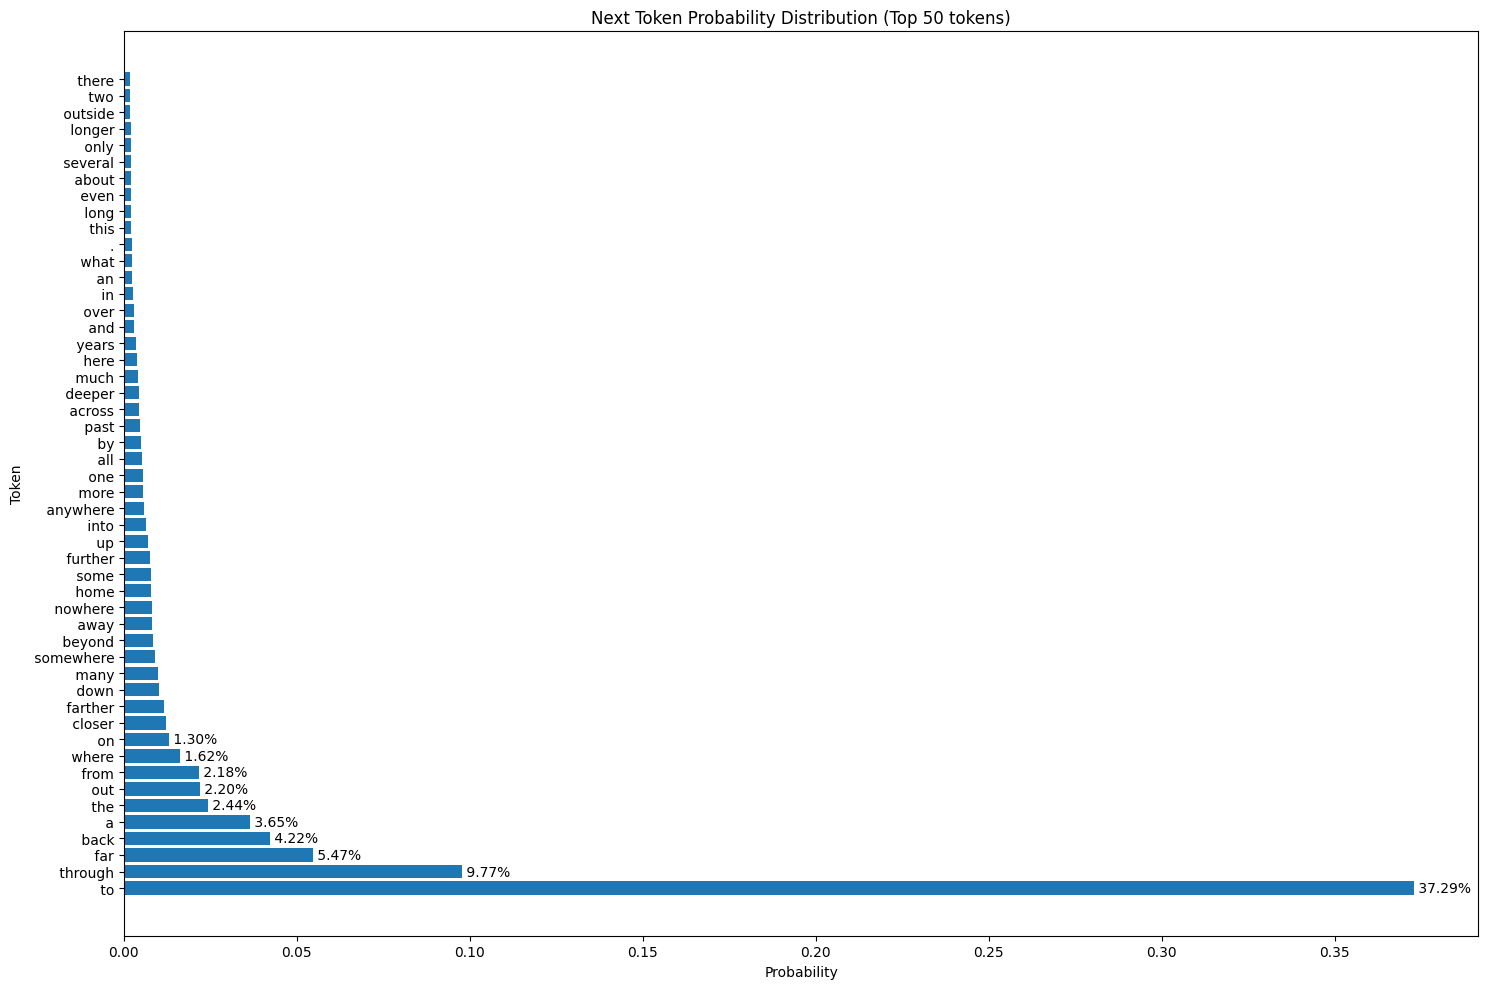

In [41]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import numpy as np
import matplotlib.pyplot as plt

def get_token_probabilities_hf(model_name="microsoft/DialoGPT-medium"):
    """
    Get token probabilities using Hugging Face Transformers
    This runs locally and gives you full access to logits/probabilities
    """
    print(f"Loading model: {model_name}")

    # Load tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name)

    # Add padding token if it doesn't exist
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token

    sentence = "After years of hard work, your effort will take you"

    # Tokenize input
    inputs = tokenizer.encode(sentence, return_tensors="pt")

    # Get model predictions
    with torch.no_grad():
        outputs = model(inputs)
        logits = outputs.logits

    # Get logits for the next token (last position)
    next_token_logits = logits[0, -1, :]

    # Convert to probabilities
    probabilities = torch.softmax(next_token_logits, dim=0)

    # Get top tokens
    top_k = 50
    top_probs, top_indices = torch.topk(probabilities, top_k)

    # Convert to human-readable tokens
    results = []
    for prob, idx in zip(top_probs, top_indices):
        token = tokenizer.decode([idx])
        results.append((token, prob.item()))

    print(f"\nTop {len(results)} next token probabilities:")
    print("-" * 50)

    for i, (token, prob) in enumerate(results):
        print(f"{i+1:2d}. '{token}': {prob:.4f} ({prob:.2%})")

    return results

def visualize_probabilities(results):
    """
    Create visualization similar to your OpenAI example
    """
    tokens, probs = zip(*results)

    plt.figure(figsize=(15, 10))
    plt.barh(range(len(tokens)), probs)
    plt.yticks(range(len(tokens)), tokens)
    plt.title(f'Next Token Probability Distribution (Top {len(tokens)} tokens)')
    plt.xlabel('Probability')
    plt.ylabel('Token')

    # Add percentage labels for top 10
    for i, prob in enumerate(probs[:10]):
        plt.text(prob, i, f' {prob:.2%}', va='center')

    plt.tight_layout()
    plt.show()

def compare_models():
    """
    Compare different models (if you have the computational resources)
    """
    models_to_try = [
        "gpt2",  # Smaller, faster
        "microsoft/DialoGPT-medium",
        # "meta-llama/Llama-2-7b-hf",  # Requires approval
        # "mistralai/Mistral-7B-v0.1",  # Larger models
    ]

    sentence = "After years of hard work, your effort will take you"

    for model_name in models_to_try:
        try:
            print(f"\n{'='*60}")
            print(f"Testing model: {model_name}")
            print(f"{'='*60}")

            results = get_token_probabilities_hf(model_name)

            # Show top 5 for comparison
            print(f"\nTop 5 predictions for '{sentence}':")
            for i, (token, prob) in enumerate(results[:5]):
                print(f"  {i+1}. '{token.strip()}' ({prob:.2%})")

        except Exception as e:
            print(f"❌ Error with {model_name}: {e}")

if __name__ == "__main__":
    print("🚀 Getting token probabilities with Hugging Face Transformers...")

    try:
        # Get probabilities from a local model
        results = get_token_probabilities_hf("gpt2")  # Start with smaller model

        # Visualize results
        print("\n📊 Creating visualization...")
        visualize_probabilities(results)

        # Optional: Compare multiple models
        # compare_models()

    except Exception as e:
        print(f"❌ Error: {e}")
        print("\nTo use this approach, install dependencies:")
        print("pip install torch transformers matplotlib")

In [42]:
client = Groq(api_key=os.environ.get("GROQ_API_KEY"))
def get_completion(prompt):
    """Simple function to get completion from OpenAI API"""
    response = client.chat.completions.create(
        model="llama-3.3-70b-versatile",
        messages=[{"role": "user", "content": prompt}],
        temperature=0
    )
    return response.choices[0].message.content

# Text to classify
review = "The interface is complicated and the documentation is unclear."

# 1. Zero-shot learning example
zero_shot_prompt = """
Classify if positive or negative:

Review: The interface is complicated and the documentation is unclear.
"""

print("Zero-shot Learning Result:")
print(get_completion(zero_shot_prompt))
print()

# 2. Few-shot learning example
few_shot_prompt = """
Here are some examples of software review classifications:

Review: The app is fast and intuitive to use
Classification: Positive

Review: Keeps crashing on startup
Classification: Negative

Review: Good features but has a steep learning curve
Classification: Negative

Now classify this review:
Review: The interface is complicated and the documentation is unclear.
"""

print("Few-shot Learning Result:")
print(get_completion(few_shot_prompt))



Zero-shot Learning Result:
The review is negative. The words "complicated" and "unclear" have negative connotations, indicating that the reviewer is unhappy with the interface and documentation.

Few-shot Learning Result:
Based on the provided examples, I would classify the review as:

Classification: Negative

The review mentions two negative aspects: a complicated interface and unclear documentation, with no positive comments to balance them out. This is consistent with the previous examples, where reviews with negative comments and no positive comments were classified as Negative.


In [43]:
def get_completion(prompt):
    """Simple function to get completion from OpenAI API"""
    response = client.chat.completions.create(
        model="llama-3.3-70b-versatile",
        messages=[{"role": "user", "content": prompt}],
        temperature=0
    )
    return response.choices[0].message.content

# Test cases - technical bug reports that need to be classified by severity
bug_reports = [
    "App crashes when uploading files larger than 2GB",
    "Font color is slightly different on the settings page",
    "Users can't log in during peak hours",
    "Tooltip shows wrong keyboard shortcut",
    "Rare data corruption occurs, leading to data loss in some edge cases",
    "Push notifications are delayed by up to 2 minutes",
    "Backend service occasionally times out during payment processing",
    "User profile pictures sometimes fail to load on the dashboard",
    "Server memory leak causes performance degradation over time",
    "Mobile app uses excessive battery when the GPS is on"
]

# Zero-shot learning attempt
zero_shot_prompt = """
Classify the following bug report into one of these severity levels:
P0 (Critical), P1 (High), P2 (Medium), P3 (Low)

Bug report: {bug}

Provide only the severity level as response (P0, P1, P2, or P3).
"""

# Few-shot learning with carefully chosen examples
few_shot_prompt = """
Here are examples of bug reports and their severity classifications:

Bug: "Service completely down for all users"
Severity: P0 (Critical - immediate fix needed, affects all users, core functionality broken)

Bug: "Payment processing fails intermittently"
Severity: P1 (High - urgent fix needed, affects revenue, has workaround)

Bug: "Search results are slow to load"
Severity: P2 (Medium - should be fixed soon, affects user experience but not blocking)

Bug: "Wrong icon color in dark mode"
Severity: P3 (Low - minor issue, can be fixed in future release)

Now classify this bug report with one of these severity levels (P0, P1, P2, or P3):
Bug: {bug}

Provide only the severity level as response (P0, P1, P2, or P3).
"""

print("Comparing Zero-shot vs Few-shot Learning for Bug Severity Classification:\n")

for bug in bug_reports:
    print(f"Bug Report: {bug}")

    # Get zero-shot prediction
    zero_result = get_completion(zero_shot_prompt.format(bug=bug))
    print(f"Zero-shot classification: {zero_result}")

    # Get few-shot prediction
    few_result = get_completion(few_shot_prompt.format(bug=bug))
    print(f"Few-shot classification: {few_result}")
    print()

Comparing Zero-shot vs Few-shot Learning for Bug Severity Classification:

Bug Report: App crashes when uploading files larger than 2GB
Zero-shot classification: P0
Few-shot classification: P1

Bug Report: Font color is slightly different on the settings page
Zero-shot classification: P3
Few-shot classification: P3

Bug Report: Users can't log in during peak hours
Zero-shot classification: P0
Few-shot classification: P1

Bug Report: Tooltip shows wrong keyboard shortcut
Zero-shot classification: P3
Few-shot classification: P3

Bug Report: Rare data corruption occurs, leading to data loss in some edge cases
Zero-shot classification: P1
Few-shot classification: P2

Bug Report: Push notifications are delayed by up to 2 minutes
Zero-shot classification: P2
Few-shot classification: P2

Bug Report: Backend service occasionally times out during payment processing
Zero-shot classification: P1
Few-shot classification: P1

Bug Report: User profile pictures sometimes fail to load on the dashboard

🚀 Getting token probabilities with Hugging Face Transformers...
Loading model: gpt2

Top 50 next token probabilities:
--------------------------------------------------
 1. ' to': 0.3729 (37.29%)
 2. ' through': 0.0977 (9.77%)
 3. ' far': 0.0547 (5.47%)
 4. ' back': 0.0422 (4.22%)
 5. ' a': 0.0365 (3.65%)
 6. ' the': 0.0244 (2.44%)
 7. ' out': 0.0220 (2.20%)
 8. ' from': 0.0218 (2.18%)
 9. ' where': 0.0162 (1.62%)
10. ' on': 0.0130 (1.30%)
11. ' closer': 0.0121 (1.21%)
12. ' farther': 0.0117 (1.17%)
13. ' down': 0.0101 (1.01%)
14. ' many': 0.0097 (0.97%)
15. ' somewhere': 0.0090 (0.90%)
16. ' beyond': 0.0084 (0.84%)
17. ' away': 0.0082 (0.82%)
18. ' nowhere': 0.0082 (0.82%)
19. ' home': 0.0080 (0.80%)
20. ' some': 0.0078 (0.78%)
21. ' further': 0.0075 (0.75%)
22. ' up': 0.0071 (0.71%)
23. ' into': 0.0062 (0.62%)
24. ' anywhere': 0.0059 (0.59%)
25. ' more': 0.0056 (0.56%)
26. ' one': 0.0054 (0.54%)
27. ' all': 0.0051 (0.51%)
28. ' by': 0.0049 (0.49%)
29. ' past': 0.0047 (0.47%)
30. ' ac

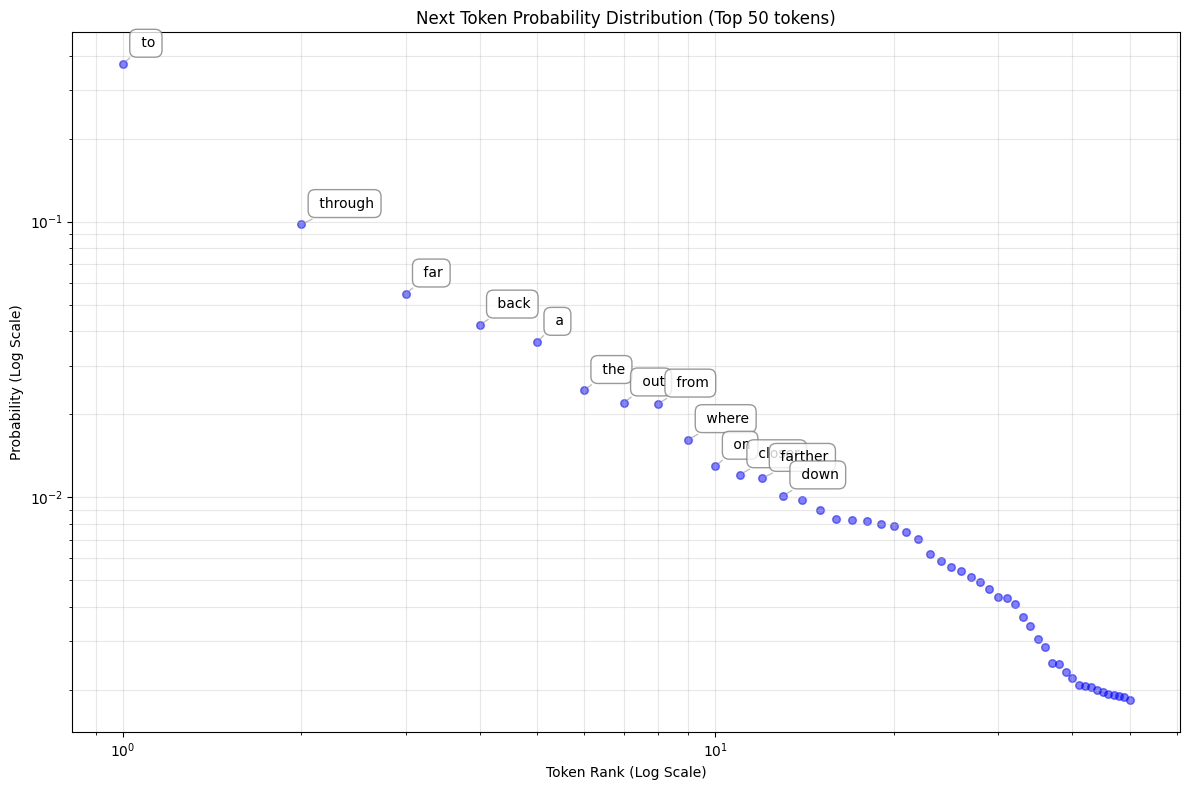

In [44]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import numpy as np
import matplotlib.pyplot as plt

def get_token_probabilities_hf(model_name="gpt2"):
    """
    Get token probabilities using Hugging Face Transformers
    This runs locally and gives you full access to logits/probabilities
    """
    print(f"Loading model: {model_name}")

    # Load tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name)

    # Add padding token if it doesn't exist
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token

    sentence = "After years of hard work, your effort will take you"

    # Tokenize input
    inputs = tokenizer.encode(sentence, return_tensors="pt")

    # Get model predictions
    with torch.no_grad():
        outputs = model(inputs)
        logits = outputs.logits

    # Get logits for the next token (last position)
    next_token_logits = logits[0, -1, :]

    # Convert to probabilities
    probabilities = torch.softmax(next_token_logits, dim=0)

    # Get top tokens
    top_k = 50
    top_probs, top_indices = torch.topk(probabilities, top_k)

    # Convert to human-readable tokens
    results = []
    for prob, idx in zip(top_probs, top_indices):
        token = tokenizer.decode([idx])
        results.append((token, prob.item()))

    print(f"\nTop {len(results)} next token probabilities:")
    print("-" * 50)

    for i, (token, prob) in enumerate(results):
        print(f"{i+1:2d}. '{token}': {prob:.4f} ({prob:.2%})")

    return results

def visualize_probabilities(results):
    """
    Create visualization similar to your OpenAI example (scatter plot with log axes)
    """
    tokens, probs = zip(*results)
    probs = np.array(probs) # Convert to numpy array for easier indexing

    # Create the plot
    plt.figure(figsize=(12, 8))

    # Create scatter plot with logarithmic axes
    # Using index as x-position (rank)
    x_positions = np.arange(1, len(tokens) + 1)
    plt.scatter(x_positions, probs, color='blue', alpha=0.5, s=30)

    # Set logarithmic scale for both axes
    plt.xscale('log')
    plt.yscale('log')

    # Customize the plot
    plt.grid(True, which="both", alpha=0.3) # Add grid for both major and minor ticks
    plt.xlabel('Token Rank (Log Scale)')
    plt.ylabel('Probability (Log Scale)')
    plt.title(f'Next Token Probability Distribution (Top {len(tokens)} tokens)')


    # Add token labels with lines
    # Decide which tokens to label (e.g., top few or based on probability threshold)
    labelled_indices = [i for i, prob in enumerate(probs) if prob > 0.01 or i < 10] # Label top 10 or those > 1%

    for i in labelled_indices:
        token = tokens[i]
        prob = probs[i]
        plt.annotate(
            token,
            xy=(x_positions[i], prob),
            xytext=(10, 10), # Offset label from point
            textcoords='offset points',
            ha='left',
            va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8),
            arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5)
        )


    # Adjust layout
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    print("🚀 Getting token probabilities with Hugging Face Transformers...")

    try:
        # Get probabilities from a local model
        results = get_token_probabilities_hf("gpt2")  # Start with smaller model

        # Visualize results
        print("\n📊 Creating visualization...")
        visualize_probabilities(results)

    except Exception as e:
        print(f"❌ Error: {e}")
        print("\nTo use this approach, install dependencies:")
        print("pip install torch transformers matplotlib")